# DSCI 100: Project Final Report
Names of Group Members: Ahmed Alkarkhi, Annie Wu, Mishka Mitchell, William Kizell 

Course: DSCI 100 – 2025W1

## Abstract 

Understanding player engagement is critical for fostering online gaming communities. Our study utilizes a dataset of 196 Minecraft players to investigate whether behavioral metrics, more specifically player experience level and total hours played,can accurately predict interest in the game's newsletter (i.e. their subscription status).

We employed a K-Nearest Neighbors (K-NN) classification algorithm, optimizing the model through 5-fold cross-validation to select the ideal number of neighbors (K). Our results indicate that while engagement metrics have some predictive power, the model's accuracy is ~61%, suggesting that subscription behavior may be influenced by factors beyond simple playtime and experience level. These findings highlight the complexity of user engagement and suggest directions for future multifaceted behavioral analysis. It also highlights the limitation of working with a relatively small dataset.

## Introduction

A research group led by Frank Wood has established a Minecraft server to study how people engage with video games. The data collected includes a range of player characteristics and gameplay metrics. In this report, we focus on a predictive question that explores whether certain traits are associated with interest in the game’s online community.

Specifically, we ask: *“Can player experience level and hours played predict newsletter subscription in the players dataset?”*

To answer this, we analyze the [players.csv](players.csv) dataset, which contains 196 observations and 7 variables:
- `experience` (chr): Player’s level of in-game experience
- `subscribe` (lgl): Whether the player is subscribed to the newsletter
- `hashedEmail` (chr): Player’s hashed email
- `played_hours` (dbl): Number of hours the player has played
- `name` (chr): Player’s name
- `gender` (chr): Player’s gender
- `Age` (dbl): Player’s age

The expectation is that player `experience` level and `played_hours` will have a significant relationship in determining the categorical response `subscribe`. The reasoning behind this expectation is that players with higher experience levels and more hours played are likely more invested in the game and its community, making them more inclined to subscribe to the newsletter to stay connected and informed. Players with higher experience levels tend to be more engaged and familiar with the game’s ecosystem. Likewise, players who have accumulated more played_hours have demonstrated sustained involvement over time. 

Together, these factors suggest that both `experience` and `played_hours` should serve as effective predictors of the response variable `subscribe`.

## Methods & Results

The data for this analysis was imported as a .csv file. To investigate whether player 'experience' and 'played_hours' can predict newsletter subscription, the relevant variables (experience, played_hours, and the response variable subscribe) were selected and prepared for classification. 

The `subscribe` variable was converted to a factor type to reflect its categorical nature. Summary statistics were computed for the two predictors, and exploratory scatterplots were created to visualize how `experience` and `played_hours` relate to subscription status, using colour to highlight the subscribed and non-subscribed groups.

Since the response variable contains two possible outcomes, TRUE or FALSE, we used K nearest neighbours classification to address the predictive question. The dataset was split into a training set that contained 75% of the observations and a testing set that contained the remaining 25%. We applied five fold cross validation with a fixed random seed to make the training process more reliable and to reduce the effect of randomness in the results.

To improve the model, we tested values of K from one to ten and chose the value that produced the highest accuracy. Before training the model, we scaled and centered the predictor variables so that differences in measurement units would not cause one variable to have more influence than the other during the distance calculations in the KNN algorithm.

By training the model, the K-NN classification was performed. Then, the quality was testeed on the test data and the effectivesness of the model was realised through plots (accuracy, confusion matrix, etc).

`experience` and `played_hours` were chosen as the predictors because they represent a player’s involvement and commitment to the game. Experience reflects how familiar a player is with the gameplay, while played_hours captures the amount of time the player has spent in the game. These characteristics are important to explore because players who are more engaged may also be more likely to subscribe to the game’s newsletter and stay connected with the community.


**Loading necessary data**

In [2]:
library(tidyverse)
library(tidymodels)
library(ggplot2)
library(dplyr)
library(repr)

options(repr.plot.height = 6, repr.plot.width = 10)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [3]:
players <- read_csv("players.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


**Wrangling the data to the format necessary for the planned analysis**

In [4]:
players <- players |> 
        select(played_hours, experience, subscribe, Age) |>
        mutate(subsribe = as_factor(subscribe))

head(players)

played_hours,experience,subscribe,Age,subsribe
<dbl>,<chr>,<lgl>,<dbl>,<fct>
30.3,Pro,TRUE,9,TRUE
3.8,Veteran,TRUE,17,TRUE
0.0,Veteran,FALSE,17,FALSE
0.7,Amateur,TRUE,21,TRUE
0.1,Regular,TRUE,21,TRUE
0.0,Amateur,TRUE,17,TRUE


**Performing a summary of the data set that is relevant for exploratory data analysis related to the planned analysis** 

The summary table for response variable `subscribe`:

In [5]:
total <- nrow(players)

options <- players |>
    group_by(subscribe) |>
    summarize(count = n(),
              "distribution (%)" = n() / total * 100)

options

subscribe,count,distribution (%)
<lgl>,<int>,<dbl>
FALSE,52,26.53061
TRUE,144,73.46939


The summary table for the predictor `played_hours`:

In [6]:
summary_played_hours <- players |>
    summarize(mean_played_hours = mean(played_hours, na.rm = TRUE), mode_played_hours = mode(played_hours),
           med_played_hours = median(played_hours, na.rm = TRUE), sd_played_hours = sd(played_hours, na.rm = TRUE),
           min_played_hours = min(played_hours, na.rm = TRUE), max_played_hours = max(played_hours, na.rm = TRUE))

summary_played_hours

mean_played_hours,mode_played_hours,med_played_hours,sd_played_hours,min_played_hours,max_played_hours
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
5.845918,numeric,0.1,28.35734,0,223.1


The summary table for the predictor `experience`:

In [7]:
summary_experience <- players |> 
    count(experience) |>
    mutate(percentage = n / sum(n) * 100)

summary_experience

experience,n,percentage
<chr>,<int>,<dbl>
Amateur,63,32.142857
Beginner,35,17.857143
Pro,14,7.142857
Regular,36,18.367347
Veteran,48,24.489796


**Creating a visualization of the dataset that is relevant for exploratory data analysis related to the planned analysis**

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”


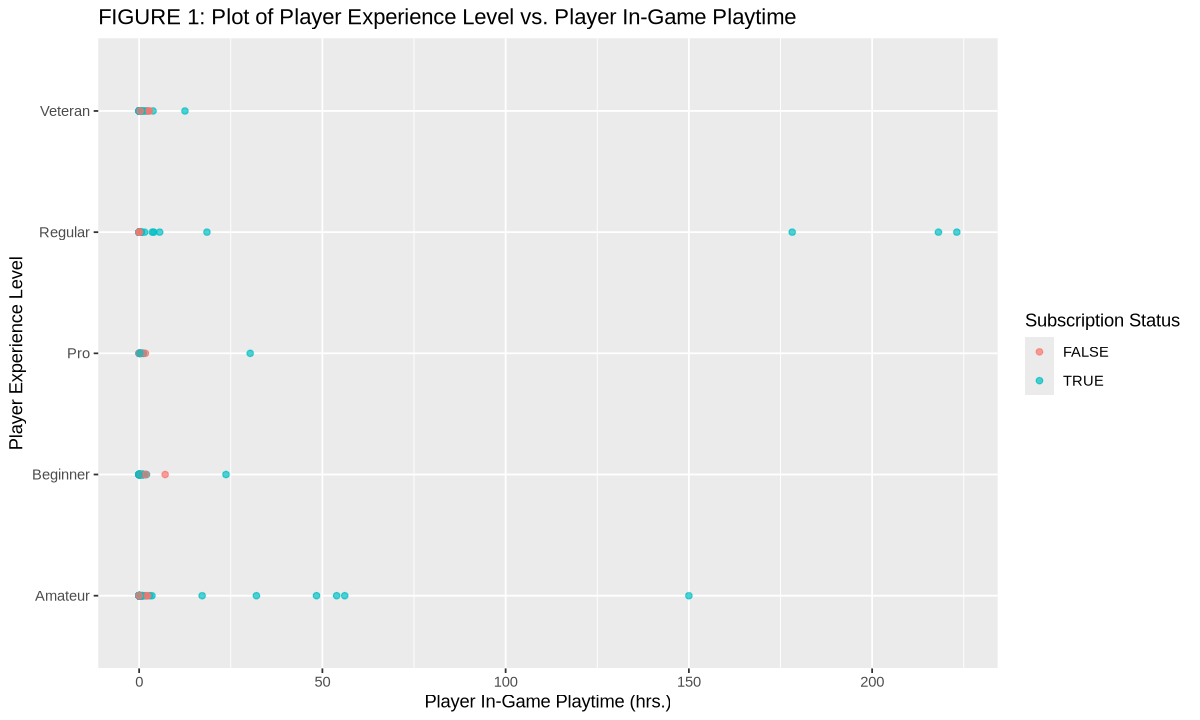

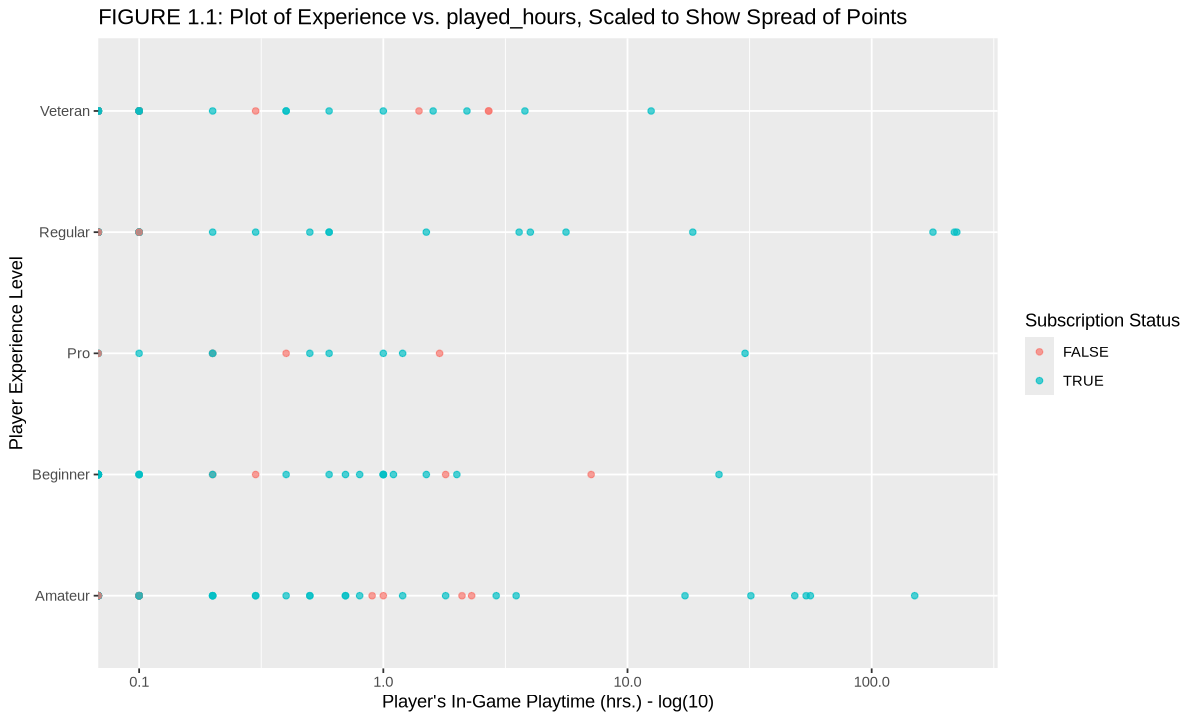

In [8]:
visual <- ggplot(players, aes(x = played_hours, y = experience, color = subscribe)) +
  geom_point(alpha = 0.7) +
  labs(title = "FIGURE 1: Plot of Player Experience Level vs. Player In-Game Playtime",
    x = "Player In-Game Playtime (hrs.)",
    y = "Player Experience Level",
    color = "Subscription Status")

scaled_visual <- visual + 
ggtitle("FIGURE 1.1: Plot of Experience vs. played_hours, Scaled to Show Spread of Points") +
    xlab("Player's In-Game Playtime (hrs.) - log(10)") +
    scale_x_log10()

visual
scaled_visual

Figure 1 and Figure 1.1 above show the varying experience levels and played_hours, coloring the points to show which types of players with these predictors are subscribed or not. 

**Performing the data analysis**

In [10]:
# setting randomisation seed
set.seed(123)

# reading in data and wrangling, removing NA values to avoid issues with splitting data
players <- read_csv("players.csv") |>
    select(experience, played_hours, subscribe) |>
    mutate(subscribe = as_factor(subscribe)) |>
    filter(experience != "NA")
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,played_hours,subscribe
<chr>,<dbl>,<fct>
Pro,30.3,TRUE
Veteran,3.8,TRUE
Veteran,0.0,FALSE
Amateur,0.7,TRUE
Regular,0.1,TRUE
Amateur,0.0,TRUE


After reading and wrangling the data, we can proceed to split the data into testing and training data with a ratio of 25/75.

In [11]:
set.seed(123)

#splitting data into testing and training data
player_split <- initial_split(players, prop = 0.75, strata = subscribe)
player_train <- training(player_split)
player_test <- testing(player_split)

We can then crete recipe and scale the data on the training data. Using the K-NN classification, we can tune and choose K-value and also perform a 5-fold cross validation. Finally, we will put it all into the workflow.

In [12]:
set.seed(123)

# creating recipe and scaling data (on training data)
player_recipe <- recipe(subscribe ~ experience + played_hours, data = player_train) |>
    step_dummy(all_nominal_predictors()) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# creating model specification with tuning to choose K value
player_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

# creating vfold for 5-fold cross validation (on training data)
player_vfold <- vfold_cv(player_train, v = 5, strata = subscribe)

# creating grid of K values to deterimine best K value
grid_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

# putting elements into a workflow
player_fit <- workflow() |>
    add_model(player_spec) |>
    add_recipe(player_recipe) |>
    tune_grid(resamples = player_vfold, grid = grid_vals)

Here we are finding the best k-value to optimize and maximize accuracy. 

In [13]:
set.seed(123)

# finding value of K that maximises accuracy
K_metrics <- player_fit |>
    collect_metrics() |>
    filter(.metric == "accuracy")

best_K <- K_metrics |>
    slice_max(mean, n = 1, with_ties = FALSE) |>
    pull(neighbors)
best_K

[1] 9

We can visualize the best k-value by creating a plot:

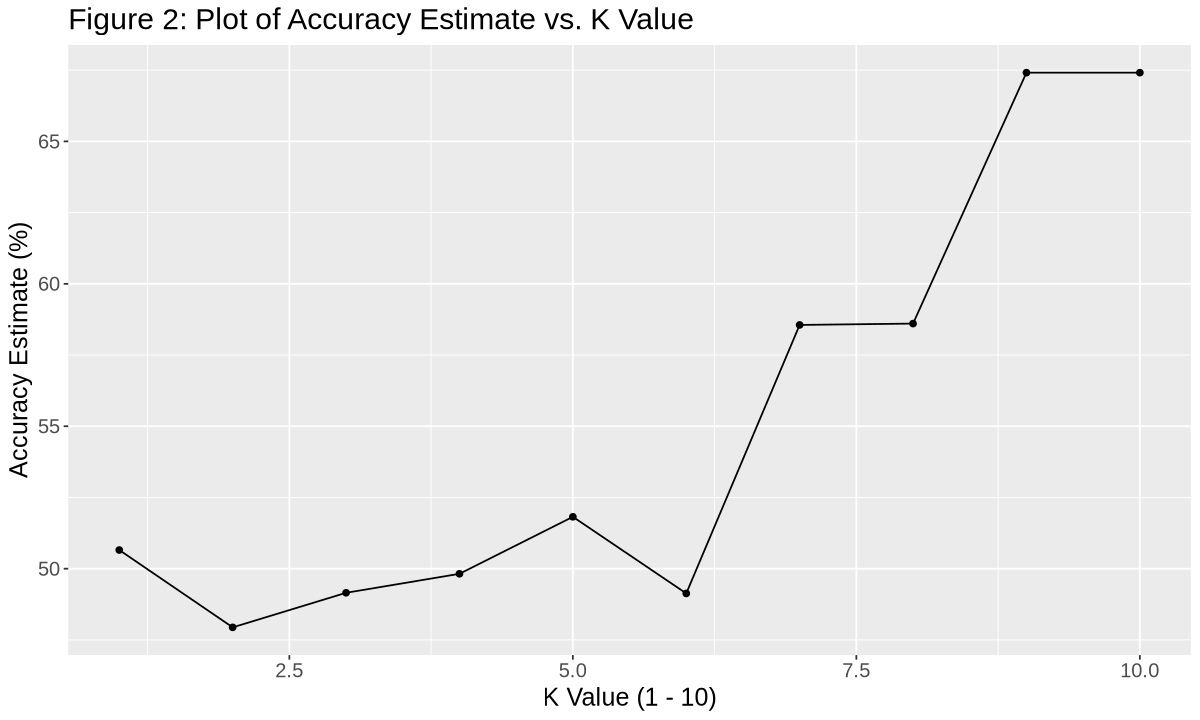

In [14]:
K_plot <- K_metrics |>
    mutate(mean = mean * 100) |>
    ggplot(aes(x = neighbors, y = mean)) +
        geom_point() +
        geom_line() +
        labs(x = "K Value (1 - 10)", y = "Accuracy Estimate (%)") +
        ggtitle("Figure 2: Plot of Accuracy Estimate vs. K Value") +
        theme(text = element_text(size = 15))
K_plot

As we can see from Figure 2, the value 9 is the most optimal, clearly showing the maximum accuracy. 

We then create a knn classification model using the best K value found earlier. We then build a workflow that combines the model with the preprocessing recipe and trains the model using the training set.

In [15]:
set.seed(123)

# creating model specification with K = 9
player_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_K) |>
    set_engine("kknn") |>
    set_mode("classification")

# recreating workflow with new model specification
player_fit2 <- workflow() |>
    add_model(player_spec2) |>
    add_recipe(player_recipe) |>
    fit(data = player_train)

We use the trained model to make predictions on the test dataset. The predictions are attached to the original test data so they can be compared to the true values. Then, we can determine the accuracy of the model by calculating it and comparing predicted classes to the actual subscription values. It extracts the accuracy metric, converts it to a percentage, and outputs the final accuracy number.

In [16]:
set.seed(123)

# predicting on test data
player_predict <- player_fit2 |>
    predict(player_test) |>
    bind_cols(player_test)

# determining model accuracy on test data in percent
player_accuracy <- player_predict |>
    metrics(truth = subscribe, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    mutate(.estimate = .estimate * 100) |>
    pull(.estimate)

player_accuracy

[1] 61.22449

This code calculates the accuracy of the model by comparing its predictions to the true subscription values in the test data. The model achieves an accuracy of about 61%. Because the model performs well, we can confidently continue with our analysis and address our main question in the report.

In [17]:

player_confusion_matrix <- player_predict |>
    conf_mat(truth = subscribe, estimate = .pred_class)

player_confusion_matrix

          Truth
Prediction FALSE TRUE
     FALSE     3    9
     TRUE     10   27

Above is a confusion matrix that summarizes how well the model predicted the subscription outcome. It compares the predicted classes to the true values in the test set and counts how many predictions fell into each category (true positives, true negatives, false positives, and false negatives). The resulting table shows the distribution of correct and incorrect classifications made by the model.

Our confusion matrix table reveals that the model performs much better at predicting players who do subscribe than players who do not. The high number of true positives (27) and very low number of true negatives (3) show that the model is heavily biased toward predicting the TRUE class.

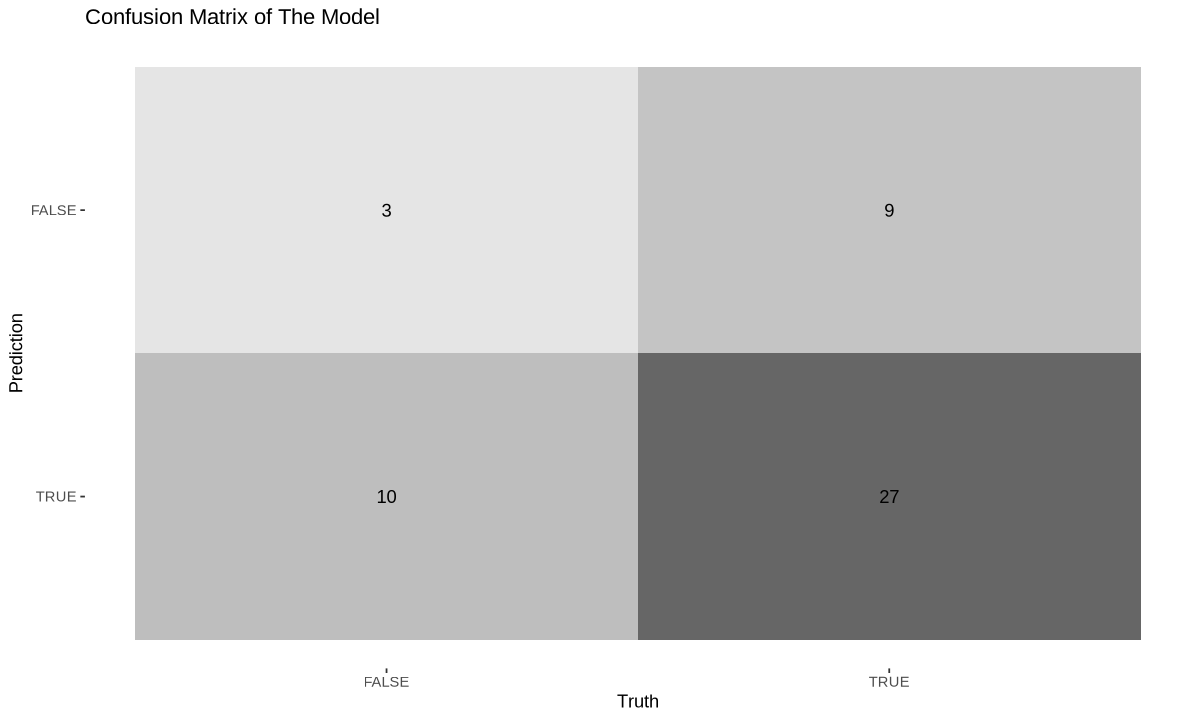

In [18]:
autoplot(player_confusion_matrix, type = "heatmap") +
  labs(title = "Confusion Matrix of The Model")

Above represents a heatmap visualization of the confusion matrix. Darker tiles represent higher counts of observations in each classification category. From the heatmap, we see that the largest and darkest tile corresponds to correct TRUE predictions, meaning the model most frequently and most accurately identifies players who do subscribe. The tile representing correct FALSE predictions is noticeably smaller and lighter, suggesting that the model is less reliable at identifying players who do not subscribe.

In [19]:
set.seed(123)

player_precision <- player_predict |>
    precision(truth = subscribe, estimate = .pred_class, event_level = "second") |>
    mutate(.estimate = .estimate * 100) |>
    pull(.estimate)

player_precision

[1] 72.97297

A precision of about 73% means that when the model predicts a player will subscribe, it is correct roughly 73% of the time.
This indicates that although the model sometimes misclassifies non-subscribing players as subscribers, most of the TRUE predictions are accurate. This result also aligns with the confusion matrix.

**Creating a visualization of the analysis**

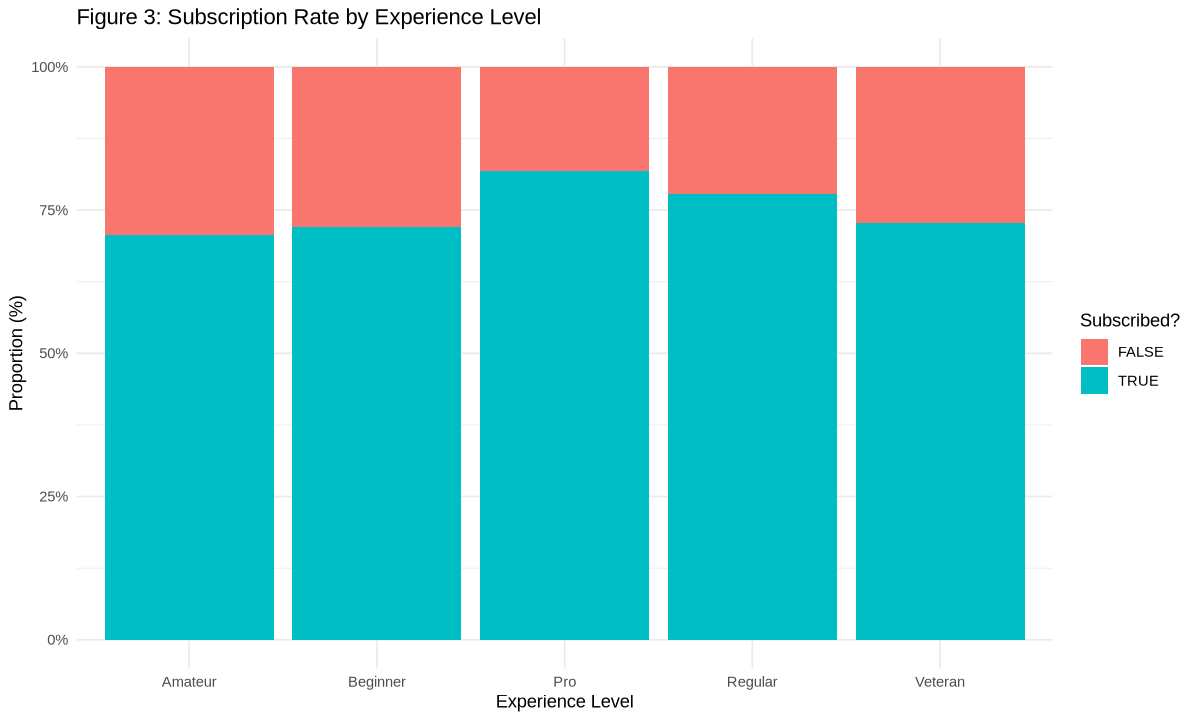

In [20]:
ggplot(player_train, aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  labs(title = "Figure 3: Subscription Rate by Experience Level",
       y = "Proportion (%)",
       x = "Experience Level",
       fill = "Subscribed?") +
  scale_y_continuous(labels = scales::percent) +
  theme_minimal()

Figure 3 confirms our initial hypothesis that players who identify as more experienced are more invested in the game's ecosystem. However, even in the "Low" experience group, there is a non-zero subscription rate, indicating that experience alone is not a perfect separator

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 63 rows containing non-finite outside the scale range (`stat_bin()`).”


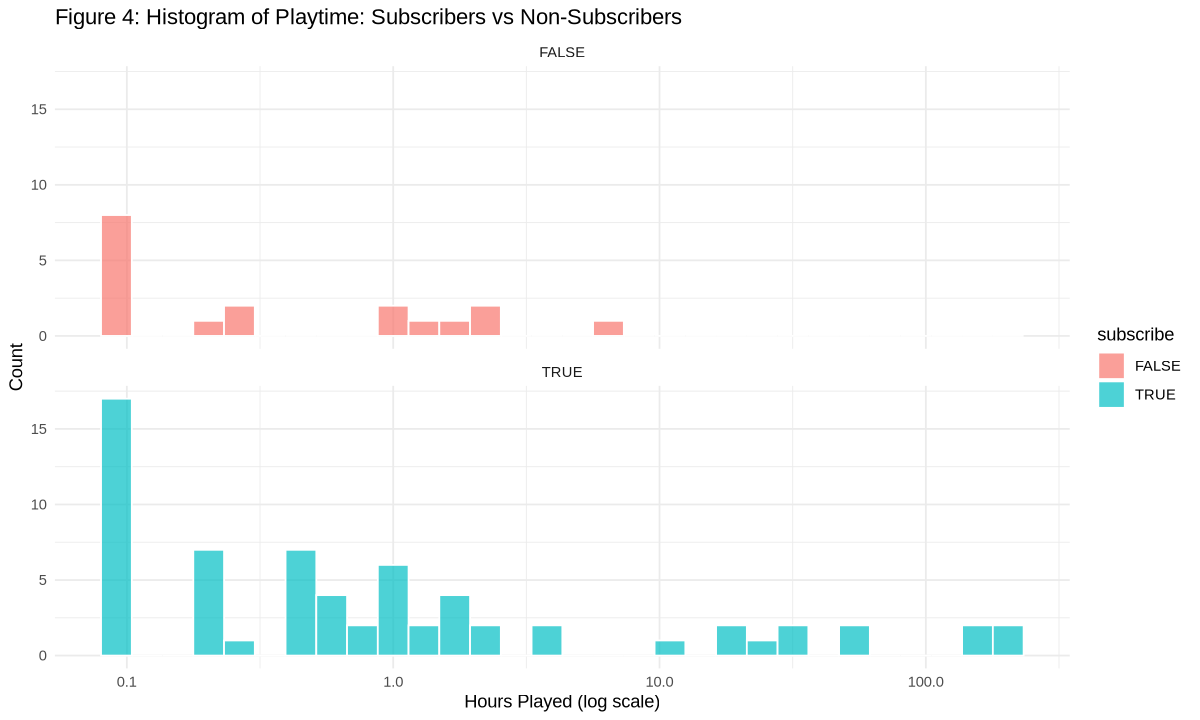

In [21]:
ggplot(player_train, aes(x = played_hours, fill = subscribe)) +
  geom_histogram(bins = 30, color = "white", alpha = 0.7) +
  facet_wrap(~ subscribe, ncol = 1) +
  scale_x_log10() +
  labs(title = "Figure 4: Histogram of Playtime: Subscribers vs Non-Subscribers",
       x = "Hours Played (log scale)",
       y = "Count") +
  theme_minimal()

Figure 4 suggests that played_hours is a strong discriminator for the model. Players with higher accumulated playtime are significantly more likely to be subscribers. However, the overlap between the two distributions (the area where high-hour non-subscribers and low-hour subscribers exist) explains why our K-NN model does not achieve a higher or even a 100% accuracy, there is an area of engagement where playtime does not perfectly predict intent.

## Discussion

We successfully constructed a K-NN classifier that performs better than random chance, with an accuracy of roughly 61%.

We found a correlation between higher playtime and experience levels and the subscription status of players, but the relationship is rather noisy.

While we expected `experience` and `played_hours` to be strong predictors given that both variables act as a proxy for interest in a player subscribing to the newsletter, we found that these alone could not predict the trends we were seeking. 

The hypothesis that "more time = more interest" holds generally, but the confusion matrix highlights a high number of False Positives. This suggests that a segment of "heavy" players engages deeply with the game mechanics but remains uninterested in the external community newsletter. This could be due to the limited data pool and or certain recruitements mechanisms which need to be optimized by the research team.

The impact of our study is that relying solely on playtime to gauge community interest may lead to missed opportunities. The model suggests that "engagement"/"interest" is multi-dimensional; gameplay activity does not perfectly correlate with community desire. Marketing efforts for the newsletter might need to be broader than just targeting the top-tier players, as players of both the same and different skill level differ in subscription interests.

We suggest that future data science research focused on answering our chosen question, amongst other similar ones, incorporates the following suggested directions to improve predictive performance of models:

1. Incorporate demographic factors such as `age` and or `Gender`.
2. Address class imbalance.


## References

1. **Timbers, T., Campbell, T., & Lee, M.** (2022). *Data Science: A First Introduction*. CRC Press. https://datasciencebook.ca/
2. **Kuhn, M., & Silge, J.** (2022). *Tidy Modeling with R*. O'Reilly Media. https://www.tmwr.org/